# Scipy 2021 Project - Sympy - Telegram - Bot - Magnus Müller and Felix Hammer

First of all, the required libraries:

In [1]:
!pip install pyTelegramBotAPI
!pip install sympy
!pip install numpy
!pip install matplotlib

You can also find them in our requiremts.txt

## First let's get a grib on pyTelegramBotAPI

Here is the documentation: https://pypi.org/project/pyTelegramBotAPI/
But you don't really need it, because it is very simple:

In [2]:
import telebot # You first have to import the library (it goes by another name)

# Then you have to specify the API Key of your bot here as string: (You can create a bot with the telegram bot father and get an API Key)
API_KEY = "1913464534:AAGjZ9gC5KQmRiAjd-YWCAjhkKYGIpU6SBM"
bot = telebot.TeleBot(API_KEY) # and create a telebot with the api

# After that we just have to specify message handlers, which check wether a reply function is fitting:
@bot.message_handler(commands=['hello']) # commands accepts telegram comands (in this case "/hello")
def hello(message): # and then you just have to state the awnser function directly under the handler
    bot.send_message(message.chat.id, "Hello!") # in this case we simply send back an "Hello" to the person chatting with us
    
    
# You can also you as a handler boolean functions like this: 

def a_boolean_function(message):
    return message.text=='How are you?'

@bot.message_handler(func=a_boolean_function)
def reply(message): # and then you just have to state the awnser function directly under the handler
    bot.send_message(message.chat.id, "I am a bot, I don't have feelings")
    
# To run the bot you will then only need this command

bot.polling()  # use none_stop=True as argument to keep running after an error occured


The script runs until you interrupt it.
This was basically everything we used, besides a simple send_photo command

It is important to note that the handlers are checked in the order in which they are specified by (top down)

## Then let's have a look at SymPy

SymPy is a great library for math 

First let's import it:

In [3]:
from sympy import *

x, y, z = symbols('x y z') # here we specify the variables, we are using

# Simpy offers nice mathematical tools like this:

function = parse_expr('exp(x**2)') # Define a function with an string
print(function)
print(function.diff()) # Derivate the function
print(integrate(function)) # Integrate it 

exp(x**2)
2*x*exp(x**2)
sqrt(pi)*erfi(x)/2


These 3 functions are essentially the only functions we use

# Project’s goal, motivation and structure
## Goal
The goal of this project is to create a Telegram bot that acts as a simple "math helper".

So if you are sitting in front of a math problem and want to quickly derive a function, you can simply open Telegram instead of googling for the classic "derivation calculator" pages 

## Motivation

The motivation was basically that we like math and Python and creating this Telegram bot seemed like a great way to combine those two things. Also, a Telegram bot seemed pretty cool and we thought that knowing how to create one might be useful later on.


## Examples

<img src="img/plot.png" width=600 height=400 />

<img src="img/plot2dim.png" width=600 height=400 />

<img src="img/integrate.png" width=600 height=400 />

<img src="img/Integrate_borders.png" width=600 height=400 />

<img src="img/derivate.png" width=600 height=400 />

<img src="img/set.png" width=600 height=400 />

<img src="img/sinPlot.png" width=600 height=400 />

## Structure 

This is the structure of our bot:

<img src="img/screen.jpg">

At first sight it looks quite complex, but it is not so hard to understand.

So in the end we run the main.py file. The bot then starts polling and waits for incoming messages.
When a message is received, the bot checks to see if the message is associated with a message handler in the handler order.

The five major import handlers are those for plotting, deriving, integrating, storing a function, or computing operations over the stored function. They all call a boolean function from boolean_funtions.py, with the exception of bool_commands. 

The boolean function then calls a special parsing function from parsing_functions.py, respectively.


### parse_function
Since all functions are similar in structure, we will explain the structure using the derivation process from bottom to top:


In [4]:
from sympy import *
from parsing_functions import parse_function
x, y, z = symbols('x y z')

# The most fundamental building plot is this parse_function:
parse_function('x2')

2*x

It allows us to convert a string of a mathematical function written in the correct way into a sympy expression. 
This handles things differently than sympy's parse_expr function:

In [5]:
parse_expr('x2')

x2

Here are a few more examples:

In [6]:
parse_function('sin(exp(cos(x**2)))')

sin(exp(cos(x**2)))

In [7]:
parse_function('notafuntion%') # returns a failure message if you can't parse the function

'Function not corretly formated'

In [8]:
parse_function('butthisisafunction')

butthisisafunction

### parse_derivation
This parse_function is now used by the parse_derivation function:


In [9]:
def parse_derivation(string):
    """
    Input: string
    Output: sympy function or string if parsing failed or False if we the string does'nt start with 'derivate '
    """
    if string[0:9]=='derivate ':
        first = string.find("'")
        second = string.find("'",first+1)
        if first!= -1 and second !=-1: # if function correctly instantiated 
            pos_var=string.find('var')
            if pos_var!=-1: # if variable is specified
                if pos_var+4 < len(string) and string[pos_var+4] in ['x','y','z']: # if variable is corectly specified
                    erg = parse_function(string[first+1:second])
                    if type(erg)==str:
                        return erg
                    else:
                        return [erg,string[pos_var+4]] # return functionm variabke as list
                else:
                    return "No or wrong Variable given" # return failure message
            else:
                erg = parse_function(string[first+1:second])
                if type(erg)==str:
                    return erg
                else:
                    return [erg] # return function as list
        else:
            return 'Function not correctly instantiated'# return failure message
    return False


The function is called with the text of the incoming message as argument.
If the text does not start with 'derivate', the function simply returns false:

In [10]:
parse_derivation('deriva')

False

When we get an input that is formatted correctly, we get the parsed function, possibly a variable in the form of a list:

In [11]:
parse_derivation("derivate 'exp(sin(x**2))'")

[exp(sin(x**2))]

In [12]:
parse_derivation("derivate 'exp(sin(x**2))' var x")

[exp(sin(x**2)), 'x']

And if we detect an error, be it a wrong variable or a function that was not instated correctly, we get error messages back as strings:

In [13]:
parse_derivation("derivate 'missing_abostroph")

'Function not correctly instantiated'

In [14]:
parse_derivation("derivate ")

'Function not correctly instantiated'

In [15]:
parse_derivation("derivate '2x' var j")

'No or wrong Variable given'

In [16]:
parse_derivation("derivate '2x' var ")

'No or wrong Variable given'

In [17]:
parse_derivation("derivate '%&'")

'Function not corretly formated'

### bool_derivation
Then we will come to bool_derivation. This is the boolean function for the message handler.

In [18]:
def bool_derivation(message):
    """
    Input : telegram message
    Output: Bool
    This functions is a boolean functions for a telegram bot handler
    It is suppose to check wether one tried to specify a function for derivation (doesn't matter wether is is instantiated correclty or is a correct mathematical expression)
    """
    string = message.text
    erg=parse_derivation(string)
    if erg!= False: # when parse_derivation does not return False we know that atleast someone tried to plot a function
        pickle.dump(str([(type(erg)!=str),str(erg)]),open("temp/buffer.dat","wb")) # save the data for later because then we don't have to run every parse function again
        return True
    else:
        return False


If the parser returns False, we know that the message has nothing to do with the derivation, so we simply return false. 

If the parser doesn't return False, we know that at least someone tried to draw a function, and the return value is either an error message as a string or the function as a sympy expr.

We then use the pickle module to store the data in the buffer.dat file. [(type(erg)!=str),str(erg)] we chose this format so we know later if the return value was an error message (then the first element of the list is False)

When we save the data, we can't do the same calculations again later on


### Awnsering function: derivate
If the bool_derivation function detects a derivation attempt and therefore returns True, the function below the derivation handler is called, in this case derivate from the main.py file.


In [19]:
@bot.message_handler(func=bool_derivation)
def derivate(message):
    """This function handels the derivation (working ones and failures)"""
    text=str(message.text)
    gespeichertes_erg = getting_buffer() # get the saved data from the buffer
    if gespeichertes_erg[0]==False: # if the saved data is a failure message
        bot.send_message(message.chat.id,gespeichertes_erg[1]) # just reply with the failure message
    else: # derivate integrate the function
        erg = gespeichertes_erg[1]
        rückgabe=''
        if len(erg)==2: # if var was specified
            rückgabe= str(get_derivative(erg[0],var=erg[1]))
        elif len(erg)==1: # if var was not specified
            rückgabe= str(get_derivative(erg[0]))
        saving_last_function(rückgabe,str(message.chat.id)) # save the result as last function 
        bot.send_message(message.chat.id, rückgabe.replace('**','^'))  # reply the function

First we get the data using the getting_buffer() function. If the data or saved_erg was an error message, we simply respond with the error message.

If the data was a function, we call get_derivative from the math_part.py file, and respond with the saving_last_function function to the last derivative answered.

This structure: handler -> boolean function -> parsing function -> saving data -> awnsering function getting data -> use special fucntion like plot or get_derivative -> send reply message 

is pretty much identical to the response structures of the integration, plotting or adjustment functions.


### The temp/ folder
The last structural element worth mentioning is the temp/ folder. This is where we store all the data. In addition to buffer.dat, which we all know already, we also have plot.png. This is the image of the last plot created by plot_func.

We also have last_function.dat and set_functions.dat. These two are important elements of our bot. Like buffer.dat, these are binary records written with the pickle module. They contain dictionaries of the most recently returned/entered functions with the message.ids as keys.

Let's take a look at them:

In [20]:
import pickle
dir_of_set_functions = eval(pickle.load(open("temp/set_functions.dat","rb")))
dir_of_set_functions

{'1232133213': {'a': 2, 'b': 2},
 '848129583': '2*x+exp(z)+sin(y)',
 '1291571328': 'x'}

In [21]:
dir_of_last_functions = eval(pickle.load(open("temp/last_functions.dat","rb"))) 
dir_of_last_functions

{'1232133213': '2x',
 '87544545445454': '2*X',
 '6516546546546': '2*x',
 '87523244545445454': '2*X',
 'dsadasd': '2*X',
 '545464654': '2*X',
 '5454646556789': '2*X',
 '848129583': 'x'}

<img src="temp/plot.png">

# Running the project yourself

To run the project, you should first make sure that you have saved a dict to temp/set_functions.dat and temp/last_functions.dat and a photo to plot.png, otherwise this could cause an error.

To do this, you can simply run this cell, which cleans up the two dicts and creates a photo

True

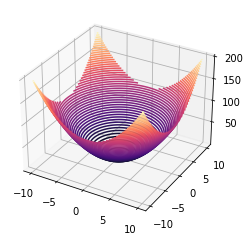

In [22]:
from plot import *
import sympy

pickle.dump(str(dict()),open("temp/last_functions.dat","wb"))
pickle.dump(str(dict()),open("temp/set_functions.dat","wb"))
plot_func(parse_expr('x**2+y**2'))

Finally, to start the bot, all you have to do is run main.py and open in Telegram @scipy_math_helper_bot. Cheers!


## Troubleshooting
- Sometimes there are troubles with installing the pPackages.
  If you get 'TeleBot' object has no attribute 'message_handler' this post helped us:   https://stackoverflow.com/a/66367224/14146951

- If there are more installation problems, try to create an virtual environment.

- If the bot says 'Function not correctly instantiated' often the mistake are the ''. So try to do not plot x, but plot 'x'.

- if the bot not works, try to create your own (https://www.youtube.com/watch?v=NwBWW8cNCP4) and replace the API_KEY in main.py. 
- for more help just write /dir